In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  
import os

In [24]:
#set column names

column_names = ['ID', 'State', 'Location', 'Year Completed', 'Primary Funding Source', 'Justification', 'Length (ft)', 'Volume (CY)', 'Total Cost',	'Year Completed CPI', 'Adjusted Cost (2022)', 'Total Cost/CY', 'Adjusted Cost/CY', 'CY/Foot', 'Current CPI', 'Other Info', 'Source Comment']

beach = pd.read_excel('data/beach_nourishment_PSDS.xlsx', names = column_names, header=0)
#drop the first column called 'ID'
beach.drop(['ID', 'Year Completed CPI', 'Current CPI', 'Other Info', 'Source Comment'], axis=1, inplace=True)

   
print(beach)

     State                              Location  Year Completed  \
0       AL                       Sand Island Bar            1987   
1       AL                           Perdido Key            1986   
2       AL                       Sand Island Bar            1988   
3       AL                           Gulf Shores            2001   
4       AL                       Sand Island Bar            1988   
...    ...                                   ...             ...   
2454    CA    Goleta Beach, Santa Barbara County            2017   
2455    CA    Goleta Beach, Santa Barbara County            2010   
2456    CA          Newport Beach, Orange County            2009   
2457    CA  Surfside/Sunset Beach, Orange County            2009   
2458    CA            Morro Bay, San Luis Obispo            2017   

     Primary Funding Source     Justification  Length (ft)  Volume (CY)  \
0                   Federal     Demonstration         6000       464000   
1                   Federal      

In [25]:
beach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2459 non-null   object 
 1   Location                2459 non-null   object 
 2   Year Completed          2459 non-null   int64  
 3   Primary Funding Source  2457 non-null   object 
 4   Justification           2459 non-null   object 
 5   Length (ft)             2459 non-null   int64  
 6   Volume (CY)             2459 non-null   int64  
 7   Total Cost              2459 non-null   int64  
 8   Adjusted Cost (2022)    2459 non-null   float64
 9   Total Cost/CY           2459 non-null   float64
 10  Adjusted Cost/CY        2459 non-null   float64
 11  CY/Foot                 2459 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 230.7+ KB


In [26]:
beach.describe()

,Year Completed,Length (ft),Volume (CY),Total Cost,Adjusted Cost (2022),Total Cost/CY,Adjusted Cost/CY,CY/Foot
count,2459.000000,2459.000000,2.459000e+03,2.459000e+03,2.459000e+03,2.459000e+03,2.459000e+03,2.459000e+03
mean,1990.987393,7022.884913,6.381578e+05,4.083488e+06,6.277340e+06,1.045617e+05,2.046339e+05,2.139504e+05
std,20.741685,12700.530217,1.298209e+06,1.279058e+07,1.635226e+07,1.228604e+06,2.296069e+06,9.670660e+05
min,1923.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1975.500000,0.000000,7.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.954500e+01
50%,1995.000000,2333.000000,2.352520e+05,2.090300e+05,8.698481e+05,1.420000e+00,6.420000e+00,9.933000e+01
75%,2007.000000,8448.000000,7.011330e+05,2.894885e+06,6.130253e+06,8.565000e+00,1.544500e+01,9.700000e+04
max,2024.000000,141000.000000,2.600930e+07,2.200000e+08,2.861956e+08,4.351273e+07,6.152742e+07,2.600930e+07


Histogram


array([[<Axes: title={'center': 'Year Completed'}>,
        <Axes: title={'center': 'Length (ft)'}>,
        <Axes: title={'center': 'Volume (CY)'}>],
       [<Axes: title={'center': 'Total Cost'}>,
        <Axes: title={'center': 'Adjusted Cost (2022)'}>,
        <Axes: title={'center': 'Total Cost/CY'}>],
       [<Axes: title={'center': 'Adjusted Cost/CY'}>,
        <Axes: title={'center': 'CY/Foot'}>, <Axes: >]], dtype=object)

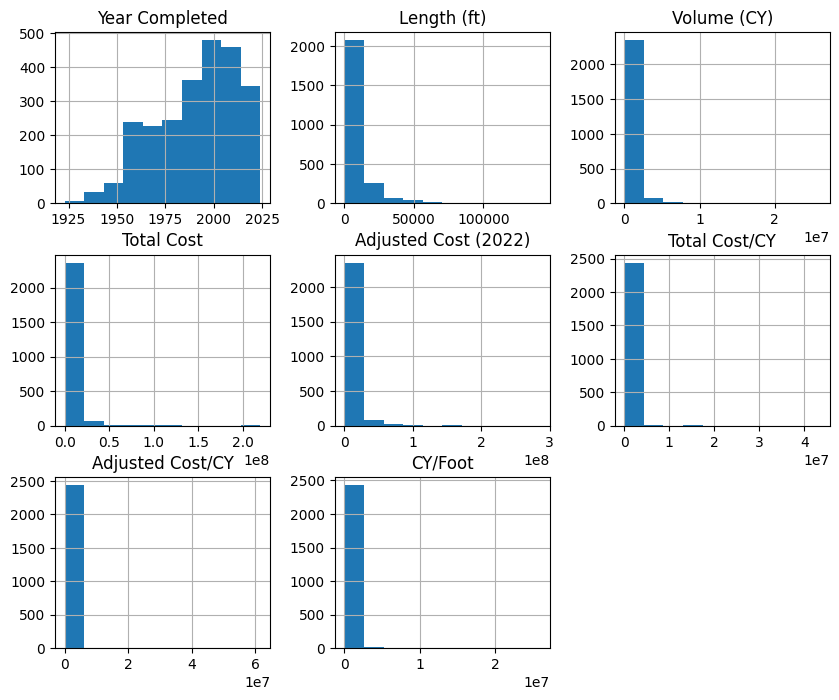

In [27]:
beach.hist(figsize=(10,8))

<Axes: >

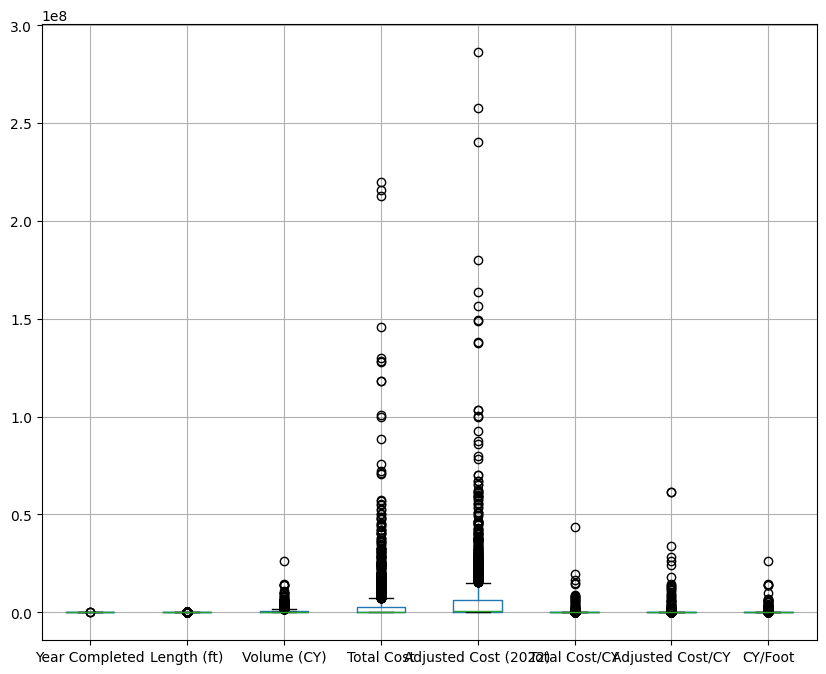

In [28]:
#box plot
beach.boxplot(figsize=(10, 8))

In [29]:
print(beach.isnull().sum())

State                     0
Location                  0
Year Completed            0
Primary Funding Source    2
Justification             0
Length (ft)               0
Volume (CY)               0
Total Cost                0
Adjusted Cost (2022)      0
Total Cost/CY             0
Adjusted Cost/CY          0
CY/Foot                   0
dtype: int64


In [30]:
group_just = beach.groupby(['Justification'])
just_counts = group_just.size().reset_index(name='Counts')
print(just_counts)

                Justification  Counts
0                      Bypass       2
1               Demonstration       4
2       Ecosystem Restoration      47
3                   Emergency     263
4              Emergency Dune      30
5   Environmental Restoration       4
6              FEMA Emergency      27
7                       MsCIP       3
8                  Navigation     581
9                 Restoration      20
10                Section 111      26
11           Shore Protection     777
12                    Unknown     675


In [31]:
group_funding = beach.groupby(['Primary Funding Source'])
fund_counts = group_funding.size().reset_index(name='Counts')
print(fund_counts)

  Primary Funding Source  Counts
0                Federal    1451
1                  Local     241
2                  Other       1
3                Private      45
4                  State     366
5                Unknown     353


In [32]:
length_by_year = beach.groupby('Year Completed').agg({'Length (ft)': 'sum', 'Volume (CY)': 'sum', 'Adjusted Cost (2022)': 'sum' })
print(length_by_year)



                Length (ft)  Volume (CY)  Adjusted Cost (2022)
Year Completed                                                
1923                   8750      1700000          4.860111e+06
1926                   2500       850000          2.230244e+06
1927                   1056       500000          1.721765e+06
1930                      0      5200000          1.798549e+07
1933                      0       606000          0.000000e+00
...                     ...          ...                   ...
2020                 531236     25340067          5.626332e+08
2021                 446650     25619252          3.945162e+08
2022                 474984     29261205          3.781656e+08
2023                 180167     10415952          2.154468e+08
2024                  15239      5014000          8.154300e+07

[95 rows x 3 columns]


In [33]:
grouped_data = beach.groupby(['State', 'Justification'])
counts = grouped_data.size().reset_index(name='Counts')
print(counts)

    State          Justification  Counts
0      AL          Demonstration       3
1      AL  Ecosystem Restoration       1
2      AL              Emergency       5
3      AL         FEMA Emergency       1
4      AL             Navigation       2
..    ...                    ...     ...
99     VA       Shore Protection      58
100    VA                Unknown      11
101    WA             Navigation       1
102    WA       Shore Protection       3
103    WA                Unknown       9

[104 rows x 3 columns]


In [34]:
#def identify_outliers(column):
#    Q1 = column.quantile(0.25)
#    Q3 = column.quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
    
    # Return a boolean Series where True means the value is NOT an outlier
 #   return column.between(lower_bound, upper_bound, inclusive='both')

# Automatically select numeric columns to check
#columns_to_check = beach.select_dtypes(include=[np.number]).columns
# Apply the outlier detection function to each specified column and store the result
#mask = pd.concat([identify_outliers(beach[col]) for col in columns_to_check], axis=1).all(axis=1)

#print(mask)
#mask.value_counts()
# Filter the DataFrame to only include rows where all specified columns are NOT outliers
#df_filtered = beach[mask]

#
# print(df_filtered)

In [35]:
# df_filtered.to_excel('data/beach_filtered_data.xlsx', sheet_name='Beach Filtered Data', index=False)

In [36]:
clean_beach_data = beach.copy()

In [37]:
print(clean_beach_data)

     State                              Location  Year Completed  \
0       AL                       Sand Island Bar            1987   
1       AL                           Perdido Key            1986   
2       AL                       Sand Island Bar            1988   
3       AL                           Gulf Shores            2001   
4       AL                       Sand Island Bar            1988   
...    ...                                   ...             ...   
2454    CA    Goleta Beach, Santa Barbara County            2017   
2455    CA    Goleta Beach, Santa Barbara County            2010   
2456    CA          Newport Beach, Orange County            2009   
2457    CA  Surfside/Sunset Beach, Orange County            2009   
2458    CA            Morro Bay, San Luis Obispo            2017   

     Primary Funding Source     Justification  Length (ft)  Volume (CY)  \
0                   Federal     Demonstration         6000       464000   
1                   Federal      

In [38]:
group_by_state = clean_beach_data.groupby('State')

count_per_state = group_by_state.size()
print(count_per_state)


State
AL     15
CA    366
CT     37
DE    120
FL    680
GA     14
LA     46
MA     55
MD     37
ME     19
MS     25
NC    284
NH      7
NJ    354
NY    128
RI     14
SC     94
TX     76
VA     75
WA     13
dtype: int64


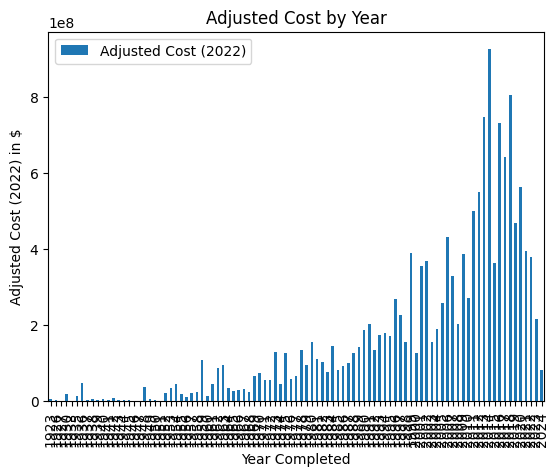

In [39]:
totals_by_year = beach.groupby('Year Completed').agg({'Adjusted Cost (2022)': 'sum' })
totals_by_year = totals_by_year.reset_index()
#plot
totals_by_year.plot(x='Year Completed', y= 'Adjusted Cost (2022)', kind='bar')
plt.title('Adjusted Cost by Year')
plt.xlabel('Year Completed')
plt.ylabel('Adjusted Cost (2022) in $')
plt.show() 

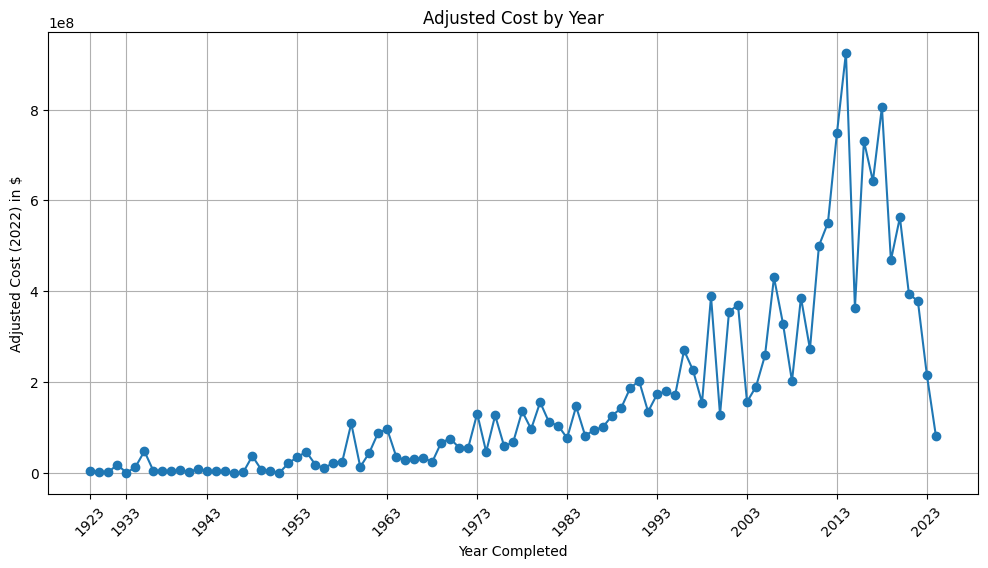

In [40]:

# Convert the 'Year Completed' column to string if it's not already, to ensure consistent tick labeling
totals_by_year['Year Completed'] = totals_by_year['Year Completed'].astype(str)

# Plotting as a line chart
plt.figure(figsize=(12, 6))  # Optional: Adjusts the size of chart
plt.plot(totals_by_year['Year Completed'], totals_by_year['Adjusted Cost (2022)'], marker='o', linestyle='-')

# Adding title and labels
plt.title('Adjusted Cost by Year')
plt.xlabel('Year Completed')
plt.ylabel('Adjusted Cost (2022) in $')

# Handling x-axis ticks for every 10 years
# Assuming 'Year Completed' are sorted and are in YYYY format
start_year = int(totals_by_year['Year Completed'].iloc[0])
end_year = int(totals_by_year['Year Completed'].iloc[-1])
tick_years = [str(year) for year in range(start_year, end_year + 1, 10)]  # Generate a list of years for ticks
plt.xticks(ticks=tick_years, labels=tick_years, rotation=45)  # Set ticks; rotation for readability

# add grid lines to make the chart easier to read
plt.grid(True)

# Show plot
plt.show()
